In [1]:
#importing libraries
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
os.chdir("V:\\kaggle\\dataset\\ship\\shipdetails")


In [5]:
#file importing
df=pd.read_excel("bulkcarrier.xlsx")
df.shape

(1604, 18)

data preprocessing

In [6]:
df.columns

Index(['Ship_Name', 'Dwt', 'LOA', 'Gt', 'Beam', 'Ship_Type',
       'Ship_Type_Grouping', 'Engine_RPM', 'Expr1008', 'LBP', 'Draft', 'Depth',
       'TEU', 'Classed_By', 'Speed', 'IMO_No', 'Displacement_Tonnage',
       'Engine_HP_Total'],
      dtype='object')

In [7]:
#data preprocessing
dropped_df=df.drop(["Ship_Name","Ship_Type_Grouping","Expr1008","Displacement_Tonnage","Speed","TEU","Ship_Type","Classed_By","IMO_No","Engine_RPM"],axis=1)

In [8]:
dropped_df.isnull().sum()

Dwt                0
LOA                0
Gt                 0
Beam               0
LBP                8
Draft              3
Depth              2
Engine_HP_Total    0
dtype: int64

In [9]:
ppdf=dropped_df.dropna(how="any",axis=0)

In [10]:
ppdf.isnull().sum()

Dwt                0
LOA                0
Gt                 0
Beam               0
LBP                0
Draft              0
Depth              0
Engine_HP_Total    0
dtype: int64

In [11]:
ppdf.drop_duplicates()
ppdf.shape

(1593, 8)

In [12]:
train=ppdf[ppdf!=0].dropna(axis=0)

In [13]:
x=train.iloc[:,0:8]
y=train["Engine_HP_Total"]

In [14]:
train.head()

,Dwt,LOA,Gt,Beam,LBP,Draft,Depth,Engine_HP_Total
0,40145,179.841995,25569,32.073002,176.796997,10.740,15.000000,8294.0
1,41093,185.399994,24111,29.549999,176.029999,11.102,15.800000,7370.0
2,41327,186.449997,25065,30.048000,177.000000,11.480,16.200001,11336.0
3,41574,182.800003,24646,30.540001,174.020004,11.015,15.780000,8419.0
4,42007,180.000000,23274,30.532000,172.000000,11.228,15.800000,7200.0


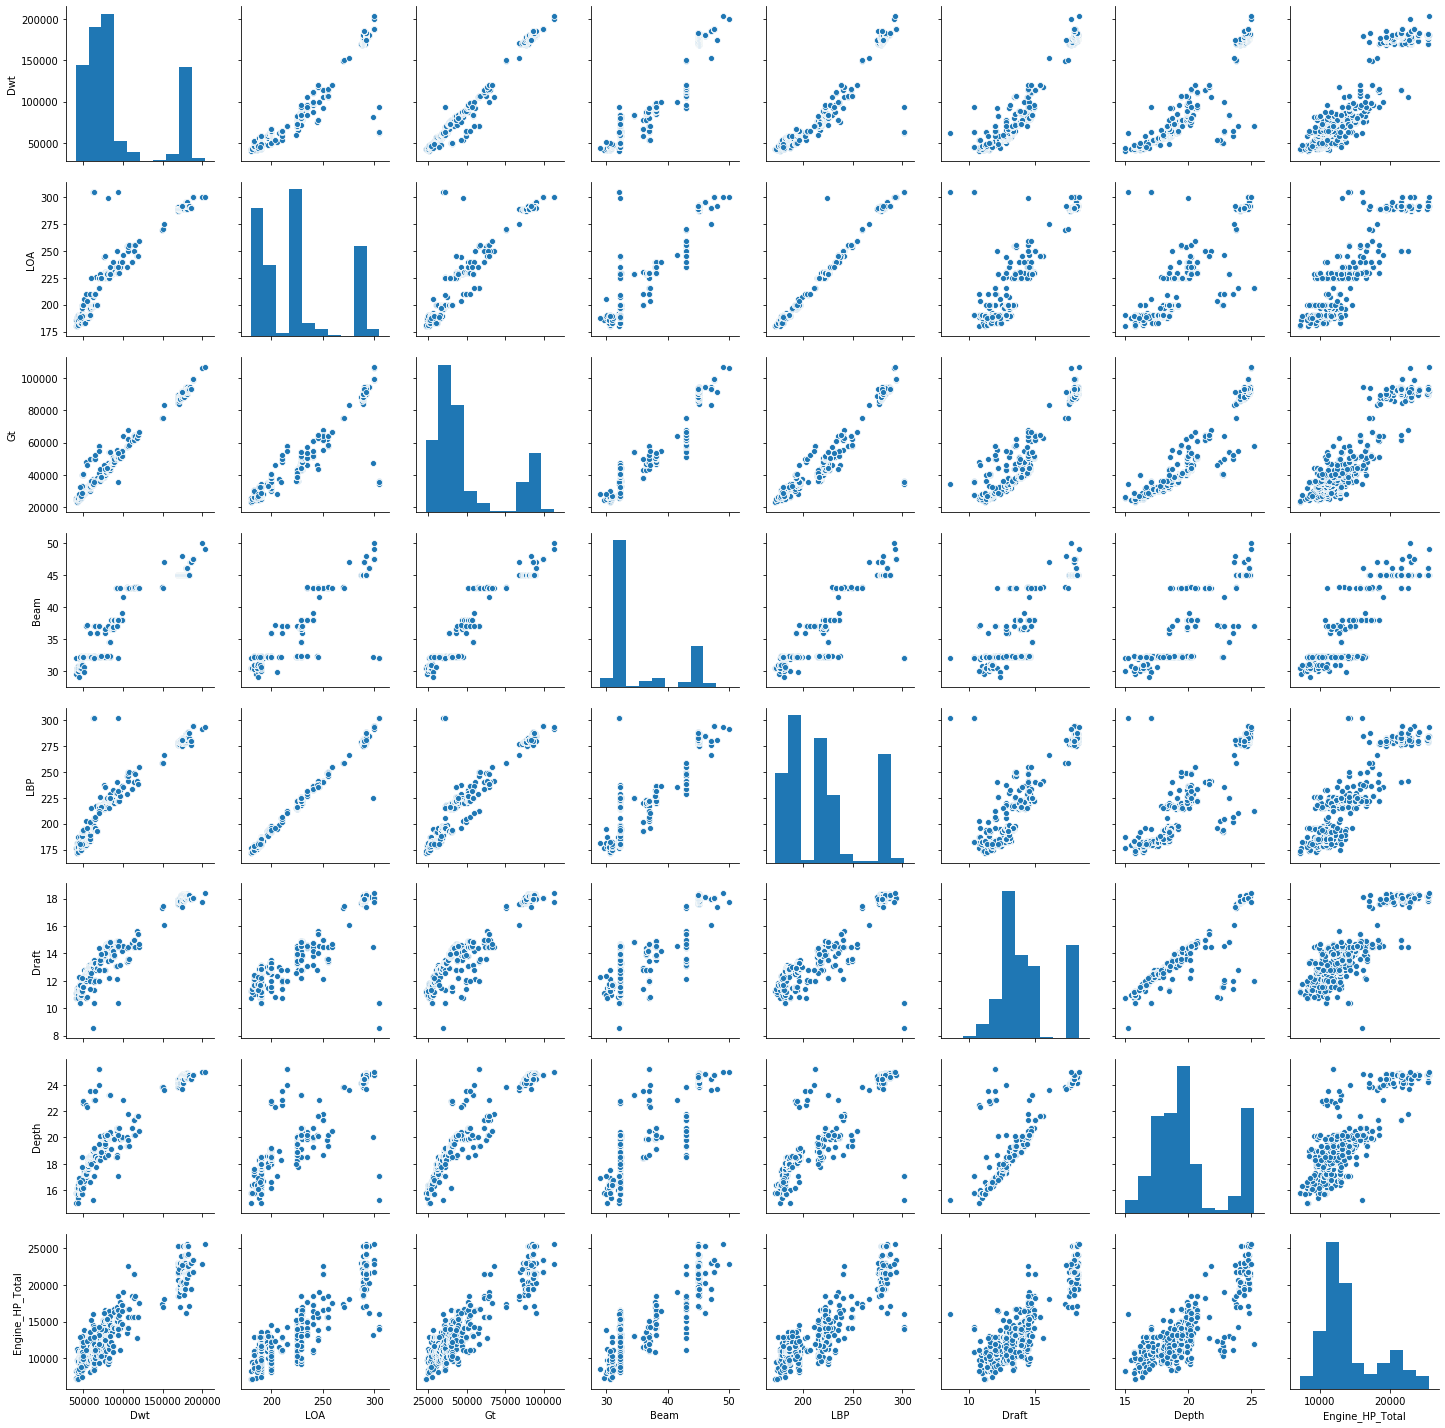

In [15]:
#data visualisation
sns.pairplot(train)


In [16]:
#feature Engineering
mean=x.mean(axis=0)
x-=mean

In [17]:
stad=x.std(axis=0)
x/=stad

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.9)

In [20]:
from keras import layers

Using TensorFlow backend.


In [21]:
from keras import models

In [22]:
model=models.Sequential()

In [23]:
#deep learning layers
model.add(layers.Dense(124,input_shape=(8,),activation="relu"))
model.add(layers.Dense(124,activation="relu"))
model.add(layers.Dense(1))

In [24]:
#optimisation and loss function
model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])


In [25]:
model.fit(xtrain,ytrain,epochs=300)



Epoch 1/300
1432/1432 [==============================] - 0s 279us/step - loss: 220419603.5754 - mean_absolute_error: 14218.2784
Epoch 2/300
1432/1432 [==============================] - 0s 53us/step - loss: 218956842.4581 - mean_absolute_error: 14173.6712
Epoch 3/300
1432/1432 [==============================] - 0s 44us/step - loss: 215936193.8771 - mean_absolute_error: 14080.2023
Epoch 4/300
1432/1432 [==============================] - 0s 51us/step - loss: 210928349.4078 - mean_absolute_error: 13923.8925
Epoch 5/300
1432/1432 [==============================] - 0s 49us/step - loss: 203632002.8603 - mean_absolute_error: 13692.7789
Epoch 6/300
1432/1432 [==============================] - 0s 50us/step - loss: 193798381.2291 - mean_absolute_error: 13371.0294
Epoch 7/300
1432/1432 [==============================] - 0s 55us/step - loss: 181481939.6648 - mean_absolute_error: 12952.4774
Epoch 8/300
1432/1432 [==============================] - 0s 48us/step - loss: 166509108.8268 - mean_absolute

In [26]:
#validation
model.evaluate(xtest,ytest)


160/160 [==============================] - 0s 261us/step


[274.9307373046875, 14.59024658203125]

In [27]:
#Mean squared error:274
#absolute mean error:14.59

In [28]:
model.save("Bulkcarrier_EngineHp_prediction.h5")